Using TensorFlow backend.


11493376/11490434 [==============================] - 0s     
(50000, 28, 28) (50000,)


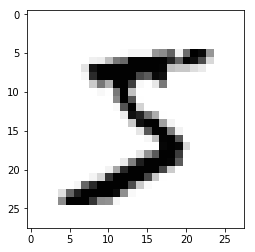

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# parameters
num_classes = 10
h_c1 = 200
h_c2 = 50
lr_rate = 1e-3
batch_size = 100

In [18]:
X_train_expand = X_train.reshape(X_train.shape[0], -1)
X_test_expand = X_test.reshape(X_test.shape[0], -1)
y_train_onehot = np.zeros((y_train.shape[0], 10))
y_train_onehot[range(y_train.shape[0]),y_train] = 1
y_test_onehot = np.zeros((y_test.shape[0], 10))
y_test_onehot[range(y_test.shape[0]), y_test] = 1
print(X_train_expand.shape)
print(X_test_expand.shape)

(50000, 784)
(10000, 784)


In [26]:
#placeholder
X_placeholder = tf.placeholder(tf.float32, [None, X_train_expand.shape[1]])
y_placeholder = tf.placeholder(tf.float32, [None,num_classes])                                            
                            
# layer 1 
W1 = tf.Variable(tf.truncated_normal([X_train_expand.shape[1], h_c1], stddev=0.01))
b1 = tf.Variable(tf.zeros(h_c1))
h1 = tf.nn.relu(tf.matmul(X_placeholder, W1) + b1)

# layer 2 
W2 = tf.Variable(tf.truncated_normal([h_c1, h_c2], stddev=0.01))
b2 = tf.Variable(tf.zeros(h_c2))
h2 = tf.nn.relu(tf.matmul(h1, W2) + b2)

# final layer 
W3 = tf.Variable(tf.truncated_normal([h_c2, num_classes], stddev=0.01))
b3 = tf.Variable(tf.zeros(num_classes))
logits = tf.matmul(h2, W3) + b3

#predict
predictions = tf.nn.softmax(logits)

In [27]:
# loss and optimizer
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_placeholder, logits=logits))
optimizer = tf.train.AdamOptimizer(learning_rate=lr_rate).minimize(loss)
accuracy = tf.reduce_sum(tf.cast(tf.equal(tf.argmax(predictions, 1), tf.argmax(y_placeholder, 1)), tf.float32))

In [28]:
#training
epochs = 70
training_loss = []
validation_loss = []
validation_accuracy = []

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    iteration = 0
    
    for epoch in range(epochs):
        for idx in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_expand[idx:idx + batch_size, :]
            y_batch = y_train_onehot[idx: idx + batch_size, :]
            feed_dict = {X_placeholder: X_batch, y_placeholder: y_batch}
            _ = sess.run(optimizer, feed_dict=feed_dict)
            iteration += 1
            if iteration % 100 == 0:
                training_loss.append(sess.run(loss, feed_dict=feed_dict))
                validation_loss.append(sess.run(loss, 
                                                feed_dict={X_placeholder: X_test_expand,
                                                           y_placeholder: y_test_onehot}))
                validation_accuracy.append(sess.run(accuracy,
                                                    feed_dict={X_placeholder: X_test_expand,
                                                           y_placeholder: y_test_onehot}))
            if iteration % 400 == 0:
                print("epoch {} step {} train_loss:{}".format(epoch, iteration, sess.run(loss, feed_dict=feed_dict)))

epoch 0 step 400 train_loss:43.828025817871094
epoch 1 step 800 train_loss:37.05624771118164
epoch 2 step 1200 train_loss:12.427605628967285
epoch 3 step 1600 train_loss:6.369599342346191
epoch 3 step 2000 train_loss:14.270720481872559
epoch 4 step 2400 train_loss:11.048868179321289
epoch 5 step 2800 train_loss:6.932413101196289
epoch 6 step 3200 train_loss:2.972724676132202
epoch 7 step 3600 train_loss:2.449965000152588
epoch 7 step 4000 train_loss:4.816091537475586
epoch 8 step 4400 train_loss:2.891862630844116
epoch 9 step 4800 train_loss:2.538396120071411
epoch 10 step 5200 train_loss:0.96541428565979
epoch 11 step 5600 train_loss:0.7473624348640442
epoch 11 step 6000 train_loss:1.5540337562561035
epoch 12 step 6400 train_loss:0.5709091424942017
epoch 13 step 6800 train_loss:0.8219940066337585
epoch 14 step 7200 train_loss:0.4943014979362488
epoch 15 step 7600 train_loss:0.19409379363059998
epoch 15 step 8000 train_loss:0.8078073859214783
epoch 16 step 8400 train_loss:0.96959769725

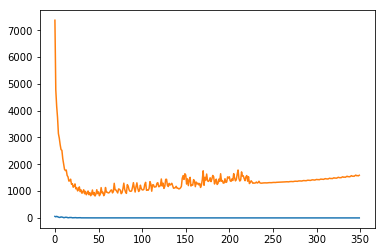

In [32]:
plt.plot(list(range(len(training_loss))), training_loss)
plt.plot(list(range(len(validation_loss))), validation_loss)
plt.show()

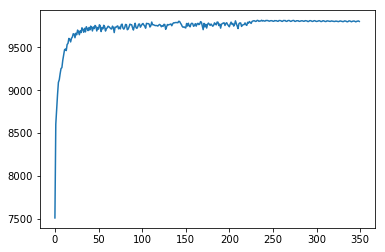

In [36]:
plt.plot(list(range(len(validation_accuracy))),validation_accuracy)
plt.show()